# Sample Charts using shared utils

You'll have to look at the docs for the specific charting packages for how to construct the chart. But, these examples show how to layer some pre-defined themes with additional colors to get as close to the FiveThirtyEight theme as possible. 

In [1]:
import altair as alt
import altair_saver
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns

from plotnine import *

from shared_utils import altair_utils, geography_utils

/Users/edasmalchi/miniconda3/envs/calitp/lib/python3.10/site-packages/google/cloud/bigquery/client.py:535: UserWarning: Cannot create BigQuery Storage client, the dependency google-cloud-bigquery-storage is not installed.


In [2]:
TABULAR_DATA = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv"
df = pd.read_csv(TABULAR_DATA)

In [3]:
df2 = geography_utils.aggregate_by_geography(
    df[(df.payment.notna()) & (df.pickup_borough.notna())], 
    group_cols = ["pickup_borough", "payment"],
    sum_cols = ["passengers", "fare"],
    mean_cols = ["distance"],
    nunique_cols = ["pickup_zone", "dropoff_zone"]
)

df2.head()

,pickup_borough,payment,fare,passengers,distance,dropoff_zone,pickup_zone
0,Manhattan,credit card,44072.42,6016,2.460901,140,60
1,Manhattan,cash,14351.50,2199,2.052212,110,63
2,Queens,cash,5072.50,420,5.279135,87,24
3,Queens,credit card,11198.06,574,9.036292,130,46
4,Bronx,credit card,1842.91,80,6.944865,49,33


## altair example

* altair present themes: https://vega.github.io/vega-themes/
* rendering in notebook is ok, but saving as PNG loses these chart configurations
* use function to apply the `fivethirtyeight` theme again

In [4]:
alt.themes.enable("fivethirtyeight")

chart = (alt.Chart(df2)
         .mark_bar()
         .encode(
             x=alt.X("pickup_borough:N", title="Origin Borough"),
             y=alt.Y("sum(fare):Q", title="Total Fares"),
             column = "payment:N",
             color = alt.Color("pickup_borough:N", 
                              scale=alt.Scale(
                                  range=altair_utils.FIVETHIRTYEIGHT_DIVERGING_COLORS
                              )
                              )
         )
)

chart = (altair_utils.preset_chart_config(chart)
         # Add further tweaks to configuration after
         .properties(width = 100, height = 200, 
                     title="Fares by Payment Type")
        )

# chart.save("../example_report/altair_chart.png")
chart

alt.Chart(...)

## matplotlib

In [5]:
plt.style.use('fivethirtyeight')

plt.bar("pickup_borough", height="fare", data=df2)
plt.xlabel("Origin Borough")
plt.ylabel("Total Fares")
plt.title("Fares by Borough")
plt.savefig("../example_report/matplotlib_chart.png")
plt.close()

## seaborn

Set the `fivethirtyeight` color palette

In [7]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})

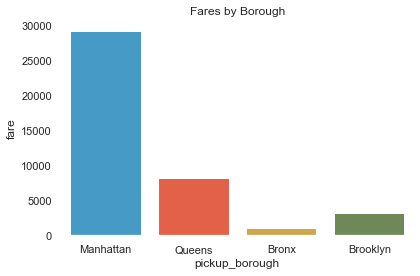

In [8]:
sns_plot = (sns.barplot(x=df2.pickup_borough, y=df2.fare, ci=None, 
                       palette=altair_utils.FIVETHIRTYEIGHT_CATEGORY_COLORS)
            .set_title("Fares by Borough")
           )
chart3 = sns_plot.get_figure()
chart3.tight_layout()
chart3.savefig("../example_report/seaborn_chart.png")

## plotnine

In [ ]:
(ggplot(df2, aes(x='payment', y="distance", fill='payment'))
 + geom_col()
 + theme_538()
 + theme(plot_background=element_rect(fill="white"), 
         panel_background=element_rect(fill="white"), 
        )
 + scale_fill_manual(values=altair_utils.FIVETHIRTYEIGHT_CATEGORY_COLORS)
 + labs(title = "Distance by Payment Type")
)

## plotly

In [ ]:
fig = px.bar(df2, x="payment", y="distance", 
             color_discrete_sequence=altair_utils.FIVETHIRTYEIGHT_CATEGORY_COLORS,
             template = "plotly_white",
             title="Distance Traveled by Payment Type"
            )
fig.show()